In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [165]:
df = pd.read_csv('source/FReDA4.csv')

In [166]:
def val_to_category(val):
    if val <= 0.5:
        return 0
    elif 0.5 < val <= 1.5:
        return 1
    elif 1.5 < val <= 2.5:
        return 2
    elif 2.5 < val <= 3.5:
        return 3
    elif 3.5 < val <= 4.5:
        return 4
    elif 4.5 < val:
        return 5
    return None


df['Freq'] = df['Frequency of Touch'].apply(val_to_category)

In [239]:
hue_order = ["Alignment", "+1", "+2", "+3 or more"]
new_palette = [
    "#C4A000",
    "#355C9C",
    "#B76A8D",
    "#009688",

]
bw = 1.5


In [220]:
satisfied = df[df["Group3"] == "Couple Agreement"].copy()
mask = (
    satisfied.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)

satisfied['TouchMatch'] = satisfied['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    satisfied.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
satisfied["TouchDiff"] = satisfied["CoupleId"].map(diffs)

In [223]:
# touchmatch_counts = (
#     satisfied.drop_duplicates("CoupleId")["Diff"]
#     .value_counts()
#     .sort_index()
# )
# print(touchmatch_counts)

Text(0.5, 1.0, 'Satisfied couples')

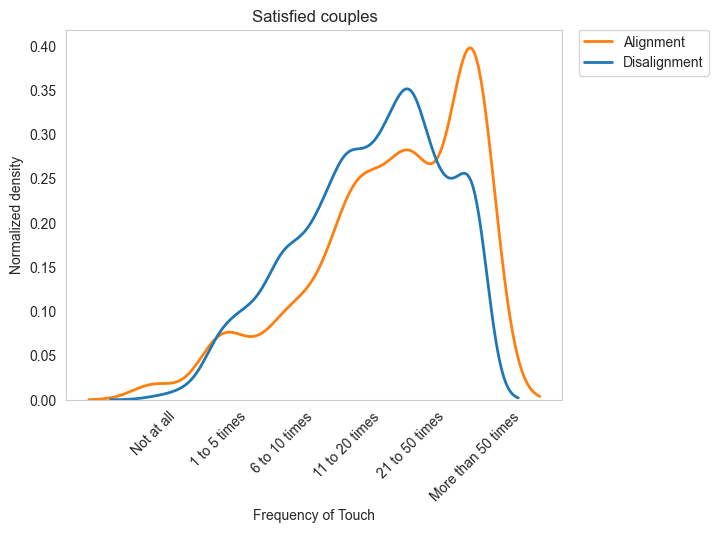

In [222]:
g = sns.kdeplot(data=satisfied,
                x="Frequency of Touch",
                hue="TouchMatch",
                common_norm=False,
                bw_adjust=1,
                fill=False,
                lw=2,
                )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)
x_legend = plt.legend(
    labels=["Alignment", "Disalignment"],
    loc='upper right',
    bbox_to_anchor=(1.31, 1.02)
)
plt.ylabel('Normalized density')
plt.title("Satisfied couples")
# plt.savefig('output/img_bg/poster/satisfied_couples.png', dpi=600, transparent=False, bbox_inches='tight')

In [225]:
# plt.figure(figsize=(8, 5))
#
# sns.kdeplot(
#     data=satisfied,
#     x="Frequency of Touch",
#     common_norm=False,
#     bw_adjust=bw,
#     fill=True,
#     lw=2,
#     hue="Diff",
#     # alpha=fill,
#     # linestyle=style,
#     color=new_palette,
#     # color = "#000000"
# )
#
# styles = ['-', '-.']
# fillers = [0.4, 0.2]
# for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
#     sns.kdeplot(
#         data=satisfied[satisfied["Diff"] == group],
#         x="Frequency of Touch",
#         common_norm=False,
#         bw_adjust=bw,
#         fill=True,
#         lw=2,
#         alpha=fill,
#         linestyle=style,
#         color=new_palette[0],
#         # color = "#000000"
#     )
#
# styles = ['-', '--', '-.', ':']
# for style, level in zip(styles[2:], hue_order[2:]):
#     sns.kdeplot(
#         data=satisfied[satisfied["Diff"] == level],
#         x="Frequency of Touch",
#         common_norm=False,
#         bw_adjust=bw,
#         fill=False,
#         lw=2,
#         linestyle=style,
#         color=new_palette[0],
#         # color = "#000000"
#     )
#
# plt.grid(False)
#
# x_ticks = plt.xticks(
#     ticks=[0, 1, 2, 3, 4, 5],
#     labels=[
#         "Not at all",
#         '1 to 5 times',
#         '6 to 10 times',
#         '11 to 20 times',
#         '21 to 50 times',
#         'More than 50 times',
#     ],
#     rotation=45
# )
#
# x_legend = plt.legend(
#     labels=["Alignment", "+1", "+2", "+3 or more"],
#     loc='upper right',
#     bbox_to_anchor=(1.21, 1.02)
# )
#
# y = plt.ylim(0, 0.5)
# l = plt.ylabel('Normalized density')
# t = plt.title("Satisfied couples")
# # plt.savefig('output/img_bg/poster/satisfied_couples4.png', dpi=600, transparent=False, bbox_inches='tight')

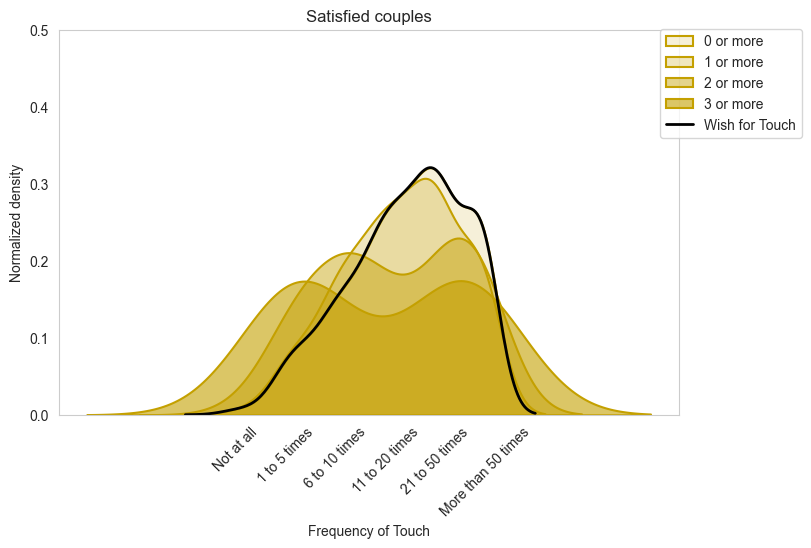

In [242]:
conditions = {
    "0 or more": satisfied[satisfied['TouchDiff'] >= 0],
    "1 or more": satisfied[satisfied['TouchDiff'] >= 1],
    "2 or more": satisfied[satisfied['TouchDiff'] >= 2],
    "3 or more": satisfied[satisfied['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))
shade = [0.15, 0.25, 0.45, 0.6]
for i, (label, subset) in enumerate(conditions.items()):
    sns.kdeplot(
        data=subset,
        x='Frequency of Touch',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[0],
        fill=True,
        lw=1.5,
        alpha=shade[i],
    )

sns.kdeplot(data=satisfied,
            x="Wish for Touch",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.21, 1.02)
)

y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Satisfied couples")
plt.savefig('output/img_bg/poster/satisfied_couples5.png', dpi=600, transparent=False, bbox_inches='tight')

In [172]:
mixed = df[df["Group3"] == "Couple Mixed"].copy()
mask = (
    mixed.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
mixed['TouchMatch'] = mixed['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    mixed.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
mixed["TouchDiff"] = mixed["CoupleId"].map(diffs)
mixed["Diff"] = mixed["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

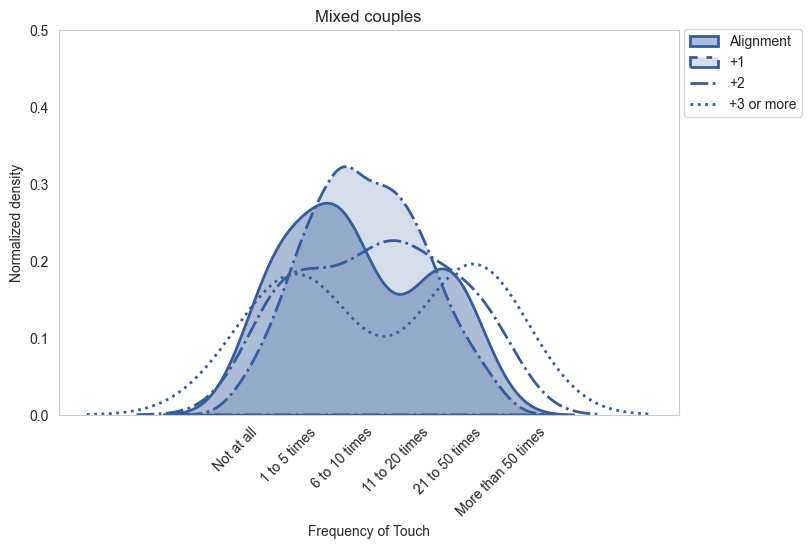

In [173]:
plt.figure(figsize=(8, 5))

styles = ['-', '-.']
fillers = [0.4, 0.2]
for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=mixed[mixed["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[1],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=mixed[mixed["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[1],
    )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1", "+2", "+3 or more"],
    loc='upper right',
    bbox_to_anchor=(1.21, 1.02)
)

y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Mixed couples")
plt.savefig('output/img_bg/poster/mixed_couples4.png', dpi=600, transparent=False, bbox_inches='tight')

In [174]:
deprived = df[df["Group2"] == "Couple Deprivation"].copy()

mask = (
    deprived.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived['TouchMatch'] = deprived['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived["TouchDiff"] = deprived["CoupleId"].map(diffs)
deprived["Diff"] = deprived["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

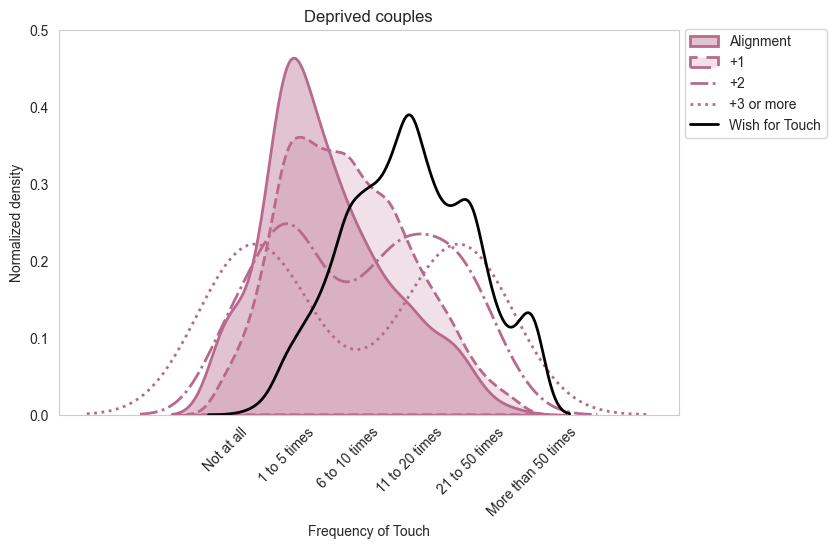

In [175]:
# hue_order = ["Alignment", "+1", "+2", "+3 or more"]
# new_palette = [
#     "#B76A8D",
#     "#009688",
#     "#C4A000",
#     "#355C9C"
# ]
# bw = 1

plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=deprived[deprived["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[2],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=deprived[deprived["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[2],
    )

sns.kdeplot(data=deprived,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1", "+2", "+3 or more", "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)
y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Deprived couples")
plt.savefig('output/img_bg/poster/deprived_couples3.png', dpi=600, transparent=False, bbox_inches='tight')

In [176]:
deprived_one = df[df["Group2"] == "One-sided Deprivation"].copy()
mask = (
    deprived_one.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived_one['TouchMatch'] = deprived_one['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_one.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_one["TouchDiff"] = deprived_one["CoupleId"].map(diffs)
deprived_one["Diff"] = deprived_one["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

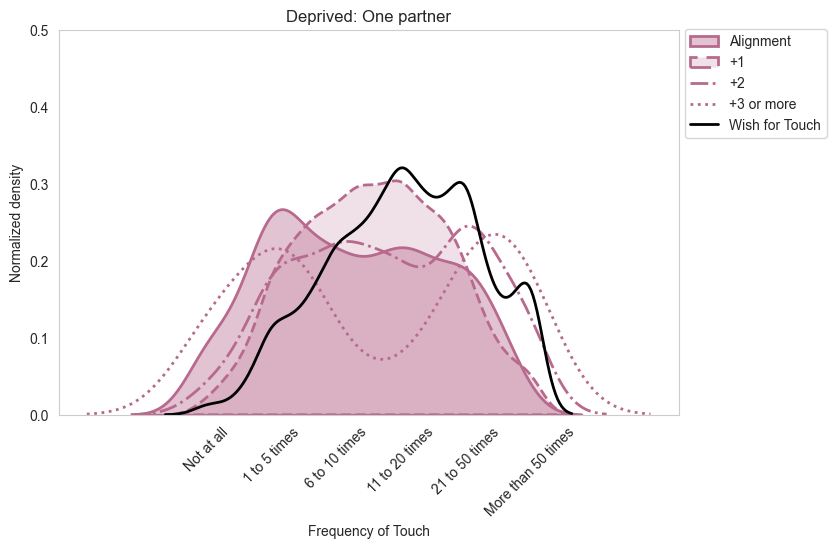

In [177]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=deprived_one[deprived_one["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[2],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=deprived_one[deprived_one["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[2],
    )

sns.kdeplot(data=deprived_one,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1", "+2", "+3 or more", "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)
y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Deprived: One partner")
plt.savefig('output/img_bg/poster/deprived_one4.png', dpi=600, transparent=False, bbox_inches='tight')

In [178]:
deprived_me = df[df["Group1"] == "SubGroup2"].copy()
mask = (
    deprived_me.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived_me['TouchMatch'] = deprived_me['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_me.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_me["TouchDiff"] = deprived_me["CoupleId"].map(diffs)
deprived_me["Diff"] = deprived_me["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

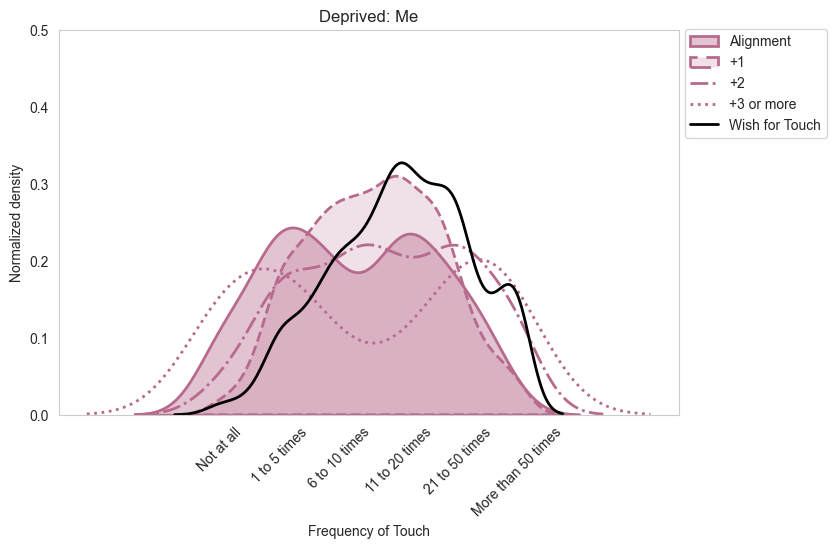

In [179]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=deprived_me[deprived_me["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[2],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=deprived_me[deprived_me["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[2],
    )

sns.kdeplot(data=deprived_me,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1", "+2", "+3 or more", "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Deprived: Me")
plt.savefig('output/img_bg/poster/deprived_me4.png', dpi=600, transparent=False, bbox_inches='tight')

In [180]:
deprived_partner = df[df["Group1"] == "SubGroup7"].copy()
mask = (
    deprived_partner.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived_partner['TouchMatch'] = deprived_partner['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_partner.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_partner["TouchDiff"] = deprived_partner["CoupleId"].map(diffs)
deprived_partner["Diff"] = deprived_partner["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

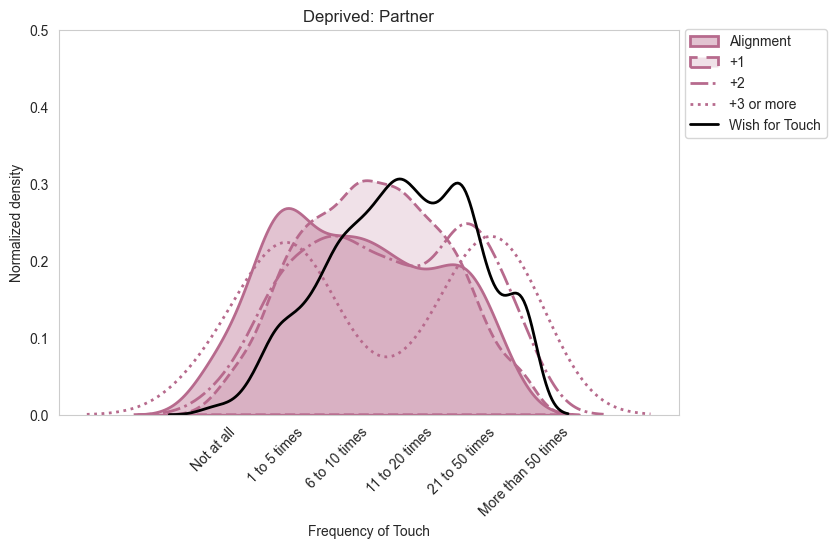

In [181]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=deprived_partner[deprived_partner["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[2],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=deprived_partner[deprived_partner["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[2],
    )

sns.kdeplot(data=deprived_partner,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1", "+2", "+3 or more", "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Deprived: Partner")
plt.savefig('output/img_bg/poster/deprived_partner4.png', dpi=600, transparent=False, bbox_inches='tight')

In [182]:
saturated = df[df["Group2"] == "Couple Saturation"].copy()
mask = (
    saturated.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
saturated['TouchMatch'] = saturated['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated["TouchDiff"] = saturated["CoupleId"].map(diffs)
saturated["Diff"] = saturated["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

C:\Users\silva\AppData\Local\Temp\ipykernel_16836\2609378950.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


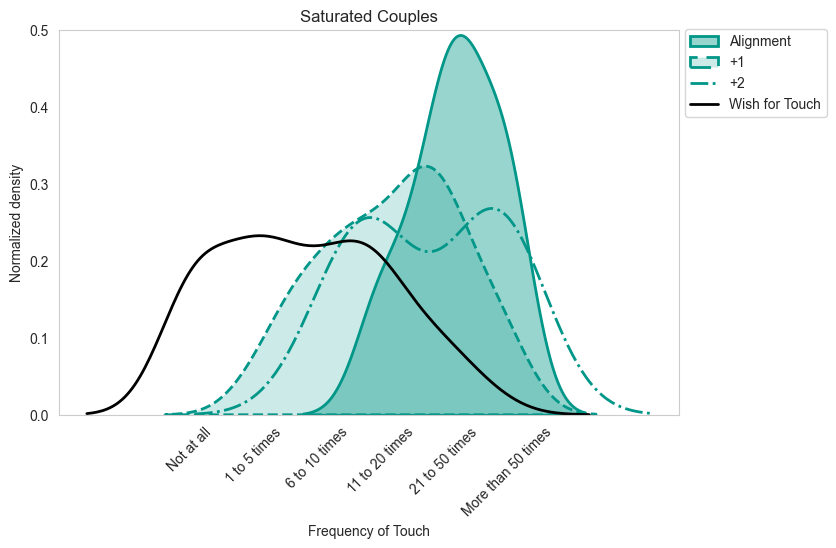

In [183]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=saturated[saturated["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[3],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=saturated[saturated["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[3],
    )

sns.kdeplot(data=saturated,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1",
            "+2",
            # "+3 or more",
            "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
l = plt.ylabel('Normalized density')
t = plt.title("Saturated Couples")
plt.savefig('output/img_bg/poster/saturated_couples4.png', dpi=600, transparent=False, bbox_inches='tight')

In [184]:
saturated_one = df[df["Group2"] == "One-sided Saturation"].copy()
mask = (
    saturated_one.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
saturated_one['TouchMatch'] = saturated_one['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_one.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_one["TouchDiff"] = saturated_one["CoupleId"].map(diffs)
saturated_one["Diff"] = saturated_one["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

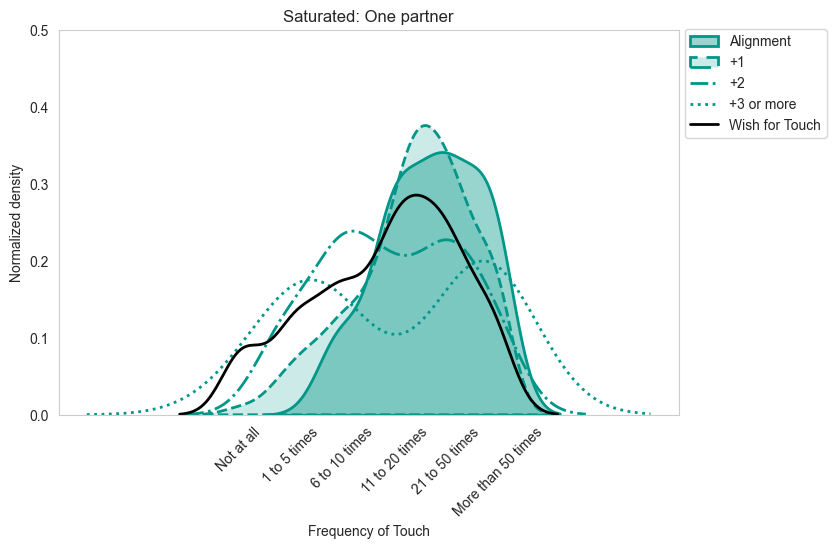

In [185]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=saturated_one[saturated_one["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[3],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=saturated_one[saturated_one["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[3],
    )

sns.kdeplot(data=saturated_one,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1",
            "+2",
            "+3 or more",
            "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
y = plt.ylabel('Normalized density')
t = plt.title("Saturated: One partner")
plt.savefig('output/img_bg/poster/saturated_one4.png', dpi=600, transparent=False, bbox_inches='tight')

In [186]:
saturated_me = df[df["Group1"] == "SubGroup5"].copy()
mask = (
    saturated_me.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
saturated_me['TouchMatch'] = saturated_me['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_me.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_me["TouchDiff"] = saturated_me["CoupleId"].map(diffs)
saturated_me["Diff"] = saturated_me["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

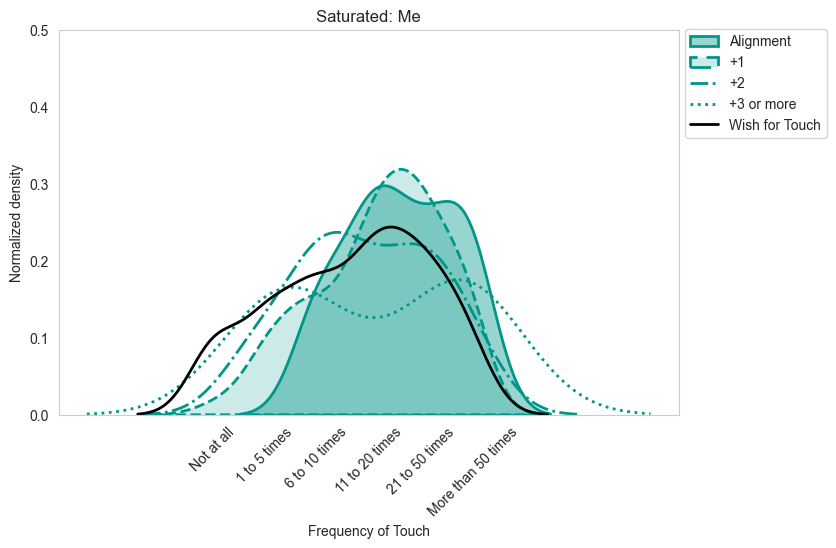

In [187]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=saturated_me[saturated_me["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        color=new_palette[3],
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=saturated_me[saturated_me["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        color=new_palette[3],
    )

sns.kdeplot(data=saturated_me,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1",
            "+2",
            "+3 or more",
            "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
y = plt.ylabel('Normalized density')
t = plt.title("Saturated: Me")
plt.savefig('output/img_bg/poster/saturated_me4.png', dpi=600, transparent=False, bbox_inches='tight')

In [188]:
saturated_partner = df[df["Group1"] == "SubGroup8"].copy()
mask = (
    saturated_partner.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
saturated_partner['TouchMatch'] = saturated_partner['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_partner.groupby("CoupleId")["Frequency of Touch"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_partner["TouchDiff"] = saturated_partner["CoupleId"].map(diffs)
saturated_partner["Diff"] = saturated_partner["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

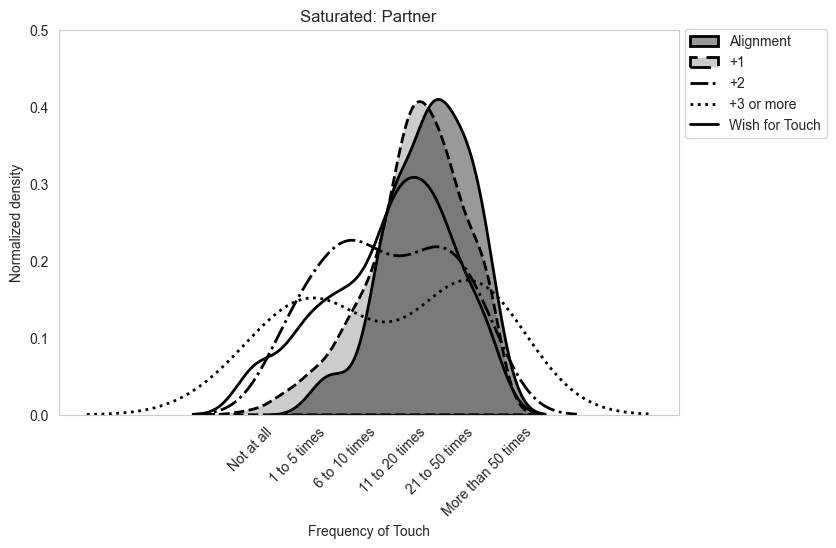

In [190]:
plt.figure(figsize=(8, 5))

for style, group, fill in zip(styles, ['Alignment', '+1'], fillers):
    sns.kdeplot(
        data=saturated_partner[saturated_partner["Diff"] == group],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=True,
        lw=2,
        alpha=fill,
        linestyle=style,
        # color=new_palette[3]
        color="#000000",
    )

styles = ['-', '--', '-.', ':']
for style, level in zip(styles[2:], hue_order[2:]):
    sns.kdeplot(
        data=saturated_partner[saturated_partner["Diff"] == level],
        x="Frequency of Touch",
        common_norm=False,
        bw_adjust=bw,
        fill=False,
        lw=2,
        linestyle=style,
        # color=new_palette[3]
        color="#000000",
    )

sns.kdeplot(data=saturated_partner,
            x="Wish for Touch",
            common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)

x_legend = plt.legend(
    labels=["Alignment", "+1",
            "+2",
            "+3 or more",
            "Wish for Touch"],
    loc='upper right',
    bbox_to_anchor=(1.25, 1.02)
)

y = plt.ylim(0, 0.5)
y = plt.ylabel('Normalized density')
t = plt.title("Saturated: Partner")
plt.savefig('output/img_bg/poster/saturated_partner3.png', dpi=600, transparent=False, bbox_inches='tight')